In [30]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [31]:
class AgentState(TypedDict):
    number1: int
    number2: int
    number3: int
    number4: int
    operation1: str
    operation2: str
    result1: int
    result2: int

In [32]:
def adder1(state: AgentState) -> AgentState:
    state["result1"] = state["number1"] + state["number2"]
    return state
def adder2(state: AgentState) -> AgentState:
    state["result2"] = state["number3"] + state["number4"]
    return state

In [33]:
def subtractor1(state: AgentState) -> AgentState:
    state["result1"] = state["number1"] - state["number2"]
    return state
def subtractor2(state: AgentState) -> AgentState:
    state["result2"] = state["number3"] - state["number4"]
    return state


In [34]:
def choose_next_node1(state:AgentState) -> str:
    if(state["operation1"] == "+"):
        return "add1"
    elif(state["operation1"] == "-"):
        return "sub1"
   


In [35]:
def choose_next_node2(state:AgentState) -> str:
    if(state["operation2"] == "+"):
        return "add2"
    elif(state["operation2"] == "-"):
        return "sub2"
   
    

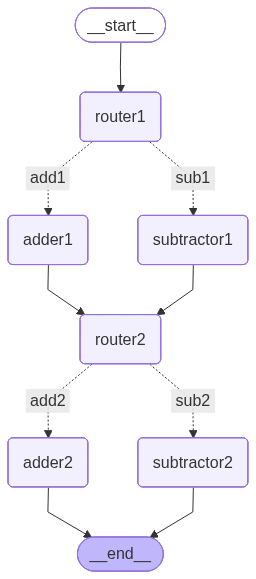

In [36]:
graph = StateGraph(AgentState)

graph.add_node("adder1", adder1)
graph.add_node("adder2", adder2)
graph.add_node("subtractor1", subtractor1)
graph.add_node("subtractor2", subtractor2)

graph.add_node("router1", lambda state: state)
graph.add_node("router2", lambda state: state)

graph.add_edge(START, "router1")
graph.add_conditional_edges(
    "router1",
    choose_next_node1,
    {
        "add1": "adder1",
        "sub1": "subtractor1",
    },
)

graph.add_edge("adder1", "router2")
graph.add_edge("subtractor1", "router2")

graph.add_conditional_edges(
    "router2",
    choose_next_node2,
    {
        "add2": "adder2",
        "sub2": "subtractor2",
    },
)

graph.add_edge("adder2", END)
graph.add_edge("subtractor2", END)

g = graph.compile()
g

In [37]:
input_state = AgentState(
    number1=1,
    number2=2,
    number3=3,
    number4=4,
    operation1="+",
    operation2="-",
)
result = g.invoke(input_state)
result

{'number1': 1,
 'number2': 2,
 'number3': 3,
 'number4': 4,
 'operation1': '+',
 'operation2': '-',
 'result1': 3,
 'result2': -1}